In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade bottleneck

  Obtaining dependency information for bottleneck from https://files.pythonhosted.org/packages/88/b8/31a1cc8279bf11a60c04b844a42666927307a47bb48964cbd92ec9f40e3e/Bottleneck-1.4.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.8
    Uninstalling Bottleneck-1.3.8:
      Successfully uninstalled Bottleneck-1.3.8
Note: you may need to restart the kernel to use updated packages.


## Perfom basic data engineering, visualization and data analysis in Python using an external set data.

### --> Use Python to obtain and prepare data. Load the original file and save the CSV to a folder called "data/".

In [4]:
import os
import pandas as pd
import requests

data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

url = "https://www.atlasevhub.com/public/dmv/MN_EV_Registrations.csv"
output_file = os.path.join(data_dir, "MN_EV_Registrations.csv")

try:
    response = requests.get(url)
    
    if response.status_code == 200:
        with open(output_file, "wb") as f:
            f.write(response.content)
        print(f"CSV file downloaded successfully as {output_file}")
        
        # Read the downloaded CSV file into pandas DataFrame
        df_EVunfltrd = pd.read_csv(output_file, low_memory=False)
        
        # Optionally, you can perform any operations on the DataFrame here
        
    else:
        print("Failed to download the file")
except Exception as e:
    print("Error:", e)

CSV file downloaded successfully as data/MN_EV_Registrations.csv


In [5]:
df_EVunfltrd.shape

(512322, 13)

In [6]:
df_EVunfltrd.head()

,State,ZIP Code,Registration Date,Vehicle Make,Vehicle Model,Vehicle Model Year,Drivetrain Type,Vehicle GVWR Class,Vehicle GVWR Category,Vehicle Count,DMV Snapshot ID,DMV Snapshot (Date),Latest DMV Snapshot Flag
0,MN,55344,10/1/2022,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,12,DMV Snapshot (7/1/2023),False
1,MN,55077,10/1/2022,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,12,DMV Snapshot (7/1/2023),False
2,MN,55406,10/1/2022,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,12,DMV Snapshot (7/1/2023),False
3,MN,55033,10/1/2022,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,12,DMV Snapshot (7/1/2023),False
4,MN,55424,10/1/2022,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,12,DMV Snapshot (7/1/2023),False


### ->Transform, filter and store the data as a new CSV.

In [7]:
import os
import pandas as pd

# Load the CSV file into a DataFrame
input_file = 'data/MN_EV_Registrations.csv'
df = pd.read_csv(input_file)

# Create a new column 'registration_year' by extracting the year from 'Registration Date'
df['registration_year'] = pd.to_datetime(df['Registration Date']).dt.year

# Calculate the count of vehicles by 'Vehicle Make'
vehicle_make_count = df['Vehicle Make'].value_counts()

# Filter out 'Vehicle Make' which did not sell more than 100 cars
mask = df['Vehicle Make'].map(vehicle_make_count) > 100
df_filtered = df[mask]

# Filter columns to the specified set
columns_to_keep = ['ZIP Code', 'Vehicle Make', 'Vehicle Model', 'registration_year', 'Vehicle Model Year']
df_filtered = df_filtered[columns_to_keep]

# Store the final filtered DataFrame to a new CSV file
output_file = 'data/FILTERED_MN_EV_Registrations.csv'
df_filtered.to_csv(output_file, index=False)

print("Filtered data saved successfully as:", output_file)


/var/folders/1r/gsf412r13xs53jmvdxmbpsqm0000gn/T/ipykernel_14764/85214389.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


Filtered data saved successfully as: data/FILTERED_MN_EV_Registrations.csv


## Plot the data using a Bar graph.

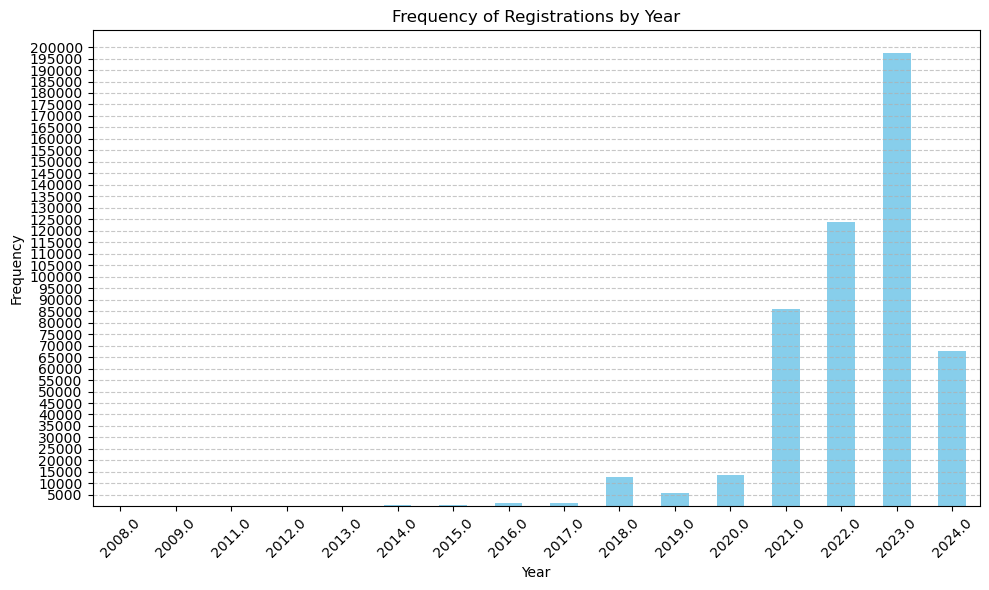

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered CSV file into a DataFrame
filtered_file = 'data/FILTERED_MN_EV_Registrations.csv'
df_EV_filtered = pd.read_csv(filtered_file)

# Count the frequency of registrations by year
yearly_registration_count = df_EV_filtered['registration_year'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
yearly_registration_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Set y-axis ticks
plt.yticks(range(5000, max(yearly_registration_count)+5000, 5000))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### React to the following statements:

##### Q) The largest number of new registrations was in 2023.

The largest number of new registrations was in 2023: YES
Look for the year with the highest frequency of registrations on the graph. It is showing that 2023 has the highest bar, so it supports the statement.

#### Q)The number of new registrations slowed in 2019.

The number of new registrations slowed in 2019: YES
Compare the frequency of registrations in 2019 to the previous years. If the bar for 2019 is shorter than the bars for the preceding years, it suggests a slowdown in registrations. 
From the graph we can see that registrations in 2018 are greater than in 2019. 

In [9]:
df_EV_filtered.shape

(511782, 5)

In [10]:
df_EV_filtered.columns

Index(['ZIP Code', 'Vehicle Make', 'Vehicle Model', 'registration_year',
       'Vehicle Model Year'],
      dtype='object')

## Use GeoPandas analyze and map datasets.

In [12]:
!pip install geopandas mapclassify folium

### Load the Shapefile ACS

In [13]:
import os
import zipfile
import requests

# Function to download and unzip the file
def download_and_unzip(url, folder):
    # Create the folder if it doesn't exist
    os.makedirs(folder, exist_ok=True)
    
    # Download the ZIP file
    response = requests.get(url)
    
    # Save the downloaded ZIP file
    zip_file_path = os.path.join(folder, "shp_society_census_acs.zip")
    with open(zip_file_path, 'wb') as f:
        f.write(response.content)
    
    # Unzip the file into the specified folder
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(folder)
    
    # Remove the downloaded ZIP file
    os.remove(zip_file_path)
    
    # Print a success message
    print(f"Data files saved successfully to '{folder}'.")

# URL of the ZIP file
zip_url = "https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_metc/society_census_acs/shp_society_census_acs.zip"

# Folder to unzip the files into
extract_to = "soc_data"

# Download and unzip the file
download_and_unzip(zip_url, extract_to)


Data files saved successfully to 'soc_data'.


In [2]:
import geopandas as gpd

In [3]:
import os
import zipfile
import requests

# Function to download and unzip the file
def download_and_unzip(url, folder):
    # Create the folder if it doesn't exist
    os.makedirs(folder, exist_ok=True)
    
    # Download the ZIP file
    response = requests.get(url)
    
    # Save the downloaded ZIP file
    zip_file_path = os.path.join(folder, "shp_bdry_zip_code_tabulation_areas.zip")
    with open(zip_file_path, 'wb') as f:
        f.write(response.content)
    
    # Unzip the file into the specified folder
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(folder)
    
    # Remove the downloaded ZIP file
    os.remove(zip_file_path)
    
    # Print a success message
    print(f"Data files saved successfully to '{folder}'.")

# URL of the ZIP file
zip_url = "https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_mngeo/bdry_zip_code_tabulation_areas/shp_bdry_zip_code_tabulation_areas.zip"

# Folder to unzip the files into
extract_to = "shp"

# Download and unzip the file
download_and_unzip(zip_url, extract_to)

Data files saved successfully to 'shp'.


In [4]:
import geopandas as gpd

In [5]:
df_tab = gpd.read_file("shp/")

In [6]:
df_tab.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_Leng,Shape_Area,geometry
0,58225,58225,B5,G6350,S,606125347.0,6393582.0,+48.6112378,-097.2227786,2.161931,0.074699,"POLYGON ((-97.42610 48.71765, -97.42606 48.717..."
1,58030,58030,B5,G6350,S,340133596.0,0.0,+46.0303340,-096.6681855,0.986934,0.039525,"POLYGON ((-96.80449 46.06586, -96.80142 46.065..."
2,56744,56744,B5,G6350,S,248778008.0,4597395.0,+48.2325749,-097.1171828,1.619517,0.030674,"POLYGON ((-97.20443 48.21641, -97.20007 48.216..."
3,57030,57030,B5,G6350,S,343925640.0,1017610.0,+43.7357247,-096.5437100,1.317356,0.038536,"POLYGON ((-96.69131 43.67476, -96.69131 43.674..."
4,56164,56164,B5,G6350,S,622930148.0,720071.0,+44.0538343,-096.3330076,1.873075,0.070037,"POLYGON ((-96.50638 43.93486, -96.50638 43.934..."


In [7]:
df_tab.columns

Index(['ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20',
       'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

<Axes: >

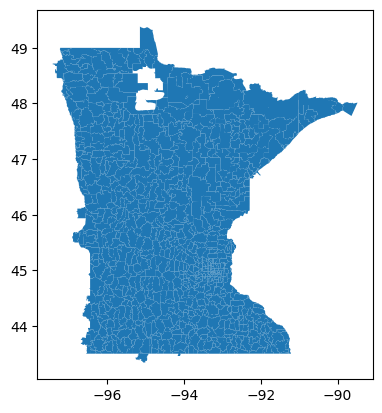

In [8]:
df_tab.plot()

In [9]:
df_acs = gpd.read_file("soc_data/CensusACSZipCode.dbf")

In [10]:
df_merged = df_tab.merge(gpd.GeoDataFrame(df_acs), left_on="GEOID20", right_on="GEOID2")

In [11]:
df_merged.geometry_x

0      POLYGON ((-97.20443 48.21641, -97.20007 48.216...
1      POLYGON ((-96.50638 43.93486, -96.50638 43.934...
2      POLYGON ((-96.49632 44.91939, -96.49631 44.919...
3      POLYGON ((-96.91975 45.57509, -96.91949 45.575...
4      POLYGON ((-96.54721 43.84817, -96.54721 43.848...
                             ...                        
876    POLYGON ((-96.94484 47.84061, -96.94397 47.840...
877    POLYGON ((-93.33159 44.79686, -93.33035 44.796...
878    POLYGON ((-95.33104 44.46906, -95.33103 44.470...
879    POLYGON ((-94.71429 43.51539, -94.71293 43.515...
880    POLYGON ((-96.37113 43.90721, -96.37045 43.908...
Name: geometry_x, Length: 881, dtype: geometry

In [12]:
df_merged.geometry_y

0      None
1      None
2      None
3      None
4      None
       ... 
876    None
877    None
878    None
879    None
880    None
Name: geometry_y, Length: 881, dtype: geometry

In [13]:
df_merged = df_merged.set_geometry("geometry_x")

<Axes: >

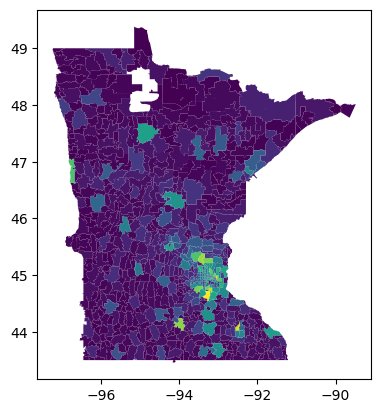

In [14]:
df_merged.plot("POPTOTAL")

### Q) What is the mean Houshold Income (MEDIANHHI) in the dataset?

In [16]:

# Assuming 'MEDIANHHI' is the column name for median household income
mean_median_hhi = df_merged['MEDIANHHI'].mean()

print("Mean Household Income (MEDIANHHI):", mean_median_hhi)

Mean Household Income (MEDIANHHI): 75854.50510783201


### How does this compare with the median HHI for the entire US in 2020?

To compare the mean household income (MEDIANHHI) from the dataset with the median household income for the entire US in 2020, we need to find the median household income for the US in 2020.

According to the U.S. Census Bureau, the median household income for the entire US in 2020 was approximately $67,521.

Comparing this with the mean household income from our dataset ($75854.50510783201), it seems that the mean household income in our dataset is approximately 12.36% higher than the median household income for the entire US in 2020.


### Which ZIP code has the highest HHI?


In [17]:
# Assuming 'MEDIANHHI' is the column name for median household income
highest_hhi_zip = df_merged.loc[df_merged['MEDIANHHI'].idxmax(), 'GEOID2']
highest_hhi_value = df_merged['MEDIANHHI'].max()

print("ZIP code with the highest median household income:", highest_hhi_zip)
print("Median household income value:", highest_hhi_value)

ZIP code with the highest median household income: 55424
Median household income value: 225119.0


### What are the top 5 ZIP codes with the largest percent population under 18 years of age?

In [18]:


top_5_zipcodes = df_merged.assign(Percent_Under_18=lambda x: (x['AGEUNDER18'] / x['POPTOTAL']) * 100)\
                           .sort_values(by='Percent_Under_18', ascending=False)\
                           .head(5)
print("Top 5 ZIP codes with the largest percent population under 18 years of age:\n")
# Display only the top 5 ZIP codes without their percentages
print(top_5_zipcodes['GEOID2'])

Top 5 ZIP codes with the largest percent population under 18 years of age:

669    55029
265    56030
663    56666
395    56210
93     56626
Name: GEOID2, dtype: object


### Which 5 ZIP codes have the highest percent of professional / graduate degrees?

In [19]:
top_5_zipcodes = df_merged.assign(Percent_Prof_Grad_Degrees=lambda x: (x['GRADPROF'] / x['POPOVER25']) * 100)\
                           .sort_values(by='Percent_Prof_Grad_Degrees', ascending=False)\
                           .head(5)

# Print the title
print("Top 5 ZIP codes with the highest percentage of population with professional/graduate degrees:\n")

# Display the top 5 ZIP codes with the highest percentage of population with professional/graduate degrees
for index, row in top_5_zipcodes.iterrows():
    print(f"ZIP Code: {row['GEOID20']}, Percentage: {row['Percent_Prof_Grad_Degrees']:.2f}%")


Top 5 ZIP codes with the highest percentage of population with professional/graduate degrees:

ZIP Code: 56321, Percentage: 58.10%
ZIP Code: 55111, Percentage: 58.00%
ZIP Code: 55455, Percentage: 57.50%
ZIP Code: 55424, Percentage: 44.06%
ZIP Code: 55401, Percentage: 39.51%


### Creating another copy of the original merged data.

In [20]:
df_merged2 = df_merged.copy()